# FOOD VİSİON
**Introduction to CNN and computer vision with Tensorflow**
dbourke.link/tfcoursegithub

## Get the  data
The images from Food101 dataset: https://www.kaggle.com/datasets/dansbecker/food-101

However we ve modeified it to only use two classes: pizza and steak.

In [4]:
##get the data

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#wget download to colab

#un_zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2023-02-01 09:36:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.9MB/s    in 5.4s    

2023-02-01 09:37:01 (19.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data(become one with it)

A very crucial step at beginning of any machine learning project is becaming one with data.

For computer vision project this means visualizing many samples of your data.

In [5]:
!ls pizza_steak #see what is in folder

test  train


In [6]:
import os

#walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
# Another way to find out how many images are in a file:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images lets get the class names programmatically.

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
#created a list of class_names from the subdirector

In [9]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [10]:
#Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  '''
  select an image randomly from this path(target_dir) of whatever class(target_class)
  that we want and then its going to plot that image
  '''

  #setup the target directory
  target_folder = target_dir+"/"+target_class

  #get random image
  random_image = random.sample(os.listdir(target_folder), 1)#randomly sample image from target folder
  print(random_image)

  #read in the image and plot
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #lining up the input and output shape is important in tensor

  return img#return array of image

['1717790.jpg']
Image shape: (512, 512, 3)


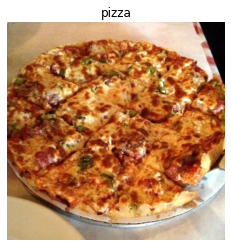

In [11]:
#view a random image

img= view_random_image(target_dir="pizza_steak/train", target_class="pizza")

['1335842.jpg']
Image shape: (384, 512, 3)


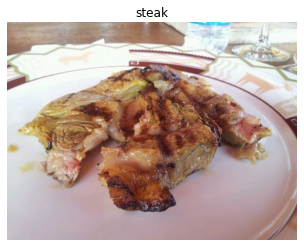

In [12]:
#view a random image

img= view_random_image(target_dir="pizza_steak/test", target_class="steak")

In [13]:
#example of turn tensor an image array
import tensorflow as tf
tf.constant(img)
#giant tensors of different pixel values

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[182, 166, 153],
        [181, 165, 152],
        [179, 163, 150],
        ...,
        [181, 202, 207],
        [178, 202, 206],
        [177, 201, 205]],

       [[176, 158, 146],
        [175, 157, 145],
        [172, 156, 143],
        ...,
        [192, 213, 218],
        [192, 213, 218],
        [192, 213, 218]],

       [[171, 153, 139],
        [170, 152, 138],
        [168, 150, 136],
        ...,
        [203, 222, 226],
        [204, 223, 227],
        [205, 224, 228]],

       ...,

       [[199, 192, 199],
        [199, 192, 199],
        [199, 192, 199],
        ...,
        [161, 132, 126],
        [160, 131, 127],
        [158, 129, 125]],

       [[199, 192, 199],
        [199, 192, 199],
        [199, 192, 199],
        ...,
        [161, 132, 126],
        [159, 130, 126],
        [157, 128, 124]],

       [[198, 191, 198],
        [198, 191, 198],
        [198, 191, 198],
        ...,
        [161, 132, 12

In [14]:
img.shape #return height, width, color channels

(384, 512, 3)

**Note** Many machine learning models, prefer the values they work with to be between 0-1. One of the most common preprocessing steps for working with images is to scale (normalize) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

In [15]:
# get all the pixel values between 0-1
img/255.

array([[[0.71372549, 0.65098039, 0.6       ],
        [0.70980392, 0.64705882, 0.59607843],
        [0.70196078, 0.63921569, 0.58823529],
        ...,
        [0.70980392, 0.79215686, 0.81176471],
        [0.69803922, 0.79215686, 0.80784314],
        [0.69411765, 0.78823529, 0.80392157]],

       [[0.69019608, 0.61960784, 0.57254902],
        [0.68627451, 0.61568627, 0.56862745],
        [0.6745098 , 0.61176471, 0.56078431],
        ...,
        [0.75294118, 0.83529412, 0.85490196],
        [0.75294118, 0.83529412, 0.85490196],
        [0.75294118, 0.83529412, 0.85490196]],

       [[0.67058824, 0.6       , 0.54509804],
        [0.66666667, 0.59607843, 0.54117647],
        [0.65882353, 0.58823529, 0.53333333],
        ...,
        [0.79607843, 0.87058824, 0.88627451],
        [0.8       , 0.8745098 , 0.89019608],
        [0.80392157, 0.87843137, 0.89411765]],

       ...,

       [[0.78039216, 0.75294118, 0.78039216],
        [0.78039216, 0.75294118, 0.78039216],
        [0.78039216, 0

## An end to end example
Build Convolutional Neural Network to find patterns.
* Load our images
* Preprocess our images
* Build a cnn to find patterns in images
* Compile our CNN
* Fit the CNN to our training data

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set seed
tf.random.set_seed(42)

#  preprocess data (scaling)
train_datagen = ImageDataGenerator(rescale=1./255)#generate batches of tensor image data with real-time data augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# flow from directory, takes the path to a directory&generates batches of augmented data.
# creates the data and labels automatically.
# target size, changes all inputs to that shape because its common.

valid_data = valid_datagen.flow_from_directory(directory=test_dir,#TEST_DIR
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
# Build CNN model (same as tiny vgg on the CNN explainer website)
#2 conv layers+ maxpool layer
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")])

#compile our cnn
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),#1500/32 train/batchsize
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 209ms/step - loss: 0.5675 - accuracy: 0.6927 - val_loss: 0.4242 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4271 - accuracy: 0.8120 - val_loss: 0.3291 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3913 - accuracy: 0.8260 - val_loss: 0.3591 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3617 - accuracy: 0.8507 - val_loss: 0.3752 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3043 - accuracy: 0.8760 - val_loss: 0.2560 - val_accuracy: 0.8940


In [17]:
# get model summary
#cnn explainer website
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before/Neural Network

Lets replicate the model we've build in previous section to see if it works with our image data.

The model were building is from: [playground.tensorflow.org](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.13137&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


In [18]:
# set random seed
tf.random.set_seed(42)

#create a model to replicate the tesorflow playground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),#first flatten bc we need to reshape/tell our NN the input shape 
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))
#faster but lower accuracy than model_1.

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 0.7711 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having x20 more parameters than our CNN model, model_2 performs terribly. We can see power of CNN.

In [20]:
#Try improve our model
#set seed
tf.random.set_seed(42)

#create the model
# extra layer and increase num of hidden units (from 4 to 100)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),#first flatten bc we need to reshape/tell our NN the input shape 
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 2.8130 - accuracy: 0.6180 - val_loss: 0.6784 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6686 - accuracy: 0.7140 - val_loss: 0.6284 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.7649 - accuracy: 0.7240 - val_loss: 0.5101 - val_accuracy: 0.7360
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.7212 - accuracy: 0.7347 - val_loss: 0.4352 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6161 - accuracy: 0.7487 - val_loss: 0.4401 - val_accuracy: 0.8140


In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [22]:
15000000/31000#(model_3/model_1 params)
#500 times the amount of parameters in our CNN

483.8709677419355

**Note:** You think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And lots of cases, it is. But in this case, the difference here is the 2 different style of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a CNN seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in on our CNN, these are often more helpful in dechiphering between different **features** in an image. 

## Binary Classification: Lets break it down
1. Visualize
2. Preprocess the data(normalizing&turning data into batches)
3. Create model
4. Fit the model
5. Evaluate
6. Adjust different params (improve it)
7. Repeat until satisfied

### 1)Visualize

['354329.jpg']
Image shape: (384, 512, 3)
['663285.jpg']
Image shape: (384, 512, 3)


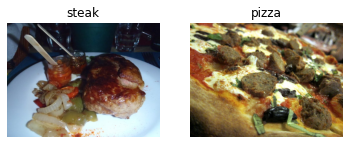

In [23]:
#visualize
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

### 2)Preprocess the data(normalizing/prepare)

In [24]:
# define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Turn our data into batches : Small subset of the data set that a model looks at during training. Rather than looking at all images at one time, a model might onlu look at 32 images at a time.
It does this for a couple of reasons:
1. 10000 images might not fit into the memory of your processor(GPU)
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn ver well.
Founder: yann lecun

In [25]:
# create train and test data genetors and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator#generates batches of tensor image data with real time data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)#multiply the data by the value provided
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
#Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size= (224,224), #target size of images(h,w)
                                               class_mode="binary",#type of data working with
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size= (224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# get a sample of train data batch
images, labels =train_data.next()# get the next batch of images/labels in train data
len(images), len(labels)#batch size 32

(32, 32)

In [28]:
#how many batches?
len(train_data)

47

In [29]:
#first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### Create a CNN model (start with baseline)

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [31]:
#create model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),#input layer specify input shape
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")#output layer working with binary classification so only 1 output neuron    
])

**Note** In deep learning there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (look at which current model is performing best in the field for your problem).

In [32]:
# compile
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [33]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [34]:
# check the lengths
len(train_data), len(test_data)

(47, 16)

In [35]:
history_4 = model_4.fit(train_data,#combination of labels and sample data, fit method can deal with so we dont need X and y
                        epochs=5,
                        steps_per_epoch=len(train_data),#total num of steps (batches of samples) before declaring one epoch finished and starting the next epoch
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 0.8692 - accuracy: 0.7127 - val_loss: 0.4172 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4204 - accuracy: 0.8147 - val_loss: 0.3820 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.2976 - accuracy: 0.8867 - val_loss: 0.3881 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.1375 - accuracy: 0.9580 - val_loss: 0.4884 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.0566 - accuracy: 0.9880 - val_loss: 0.4959 - val_accuracy: 0.7940


In [36]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 131ms/step - loss: 0.2560 - accuracy: 0.8940


[0.2559818923473358, 0.8939999938011169]

### Evaluate our model

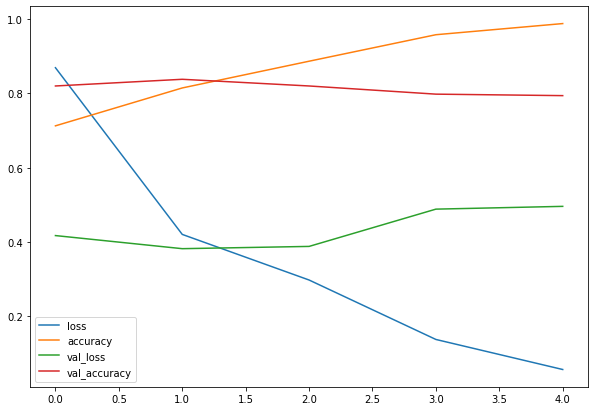

In [37]:
#lets plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [38]:
#plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate lass curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss=history.history["val_loss"]
  
  accuracy=history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  
  epochs = range(len(history.history["loss"]))# how many epochs did we run for?

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's validation loss starts to increase, it's likely that the model is overfitting the training dataset. This means it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished(azalmış).

If the training loss was decreasing like so, ideally so with the validation loss would. When you have these large discrepancies between the loss curves that your model might be overfitting. Training loss is decreasing but validation loss is increasing it tends to show that our model is overfitting. In other words, learning the training data set too well and then not generalizing to unseen data.

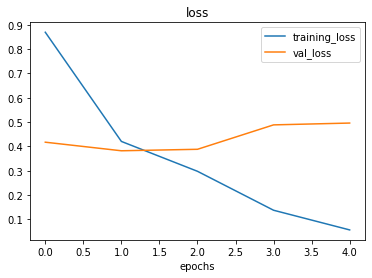

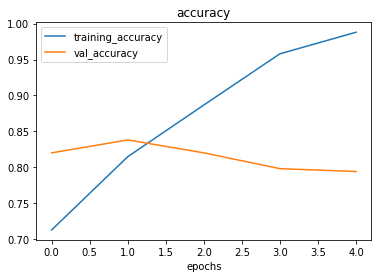

In [39]:
#check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### Adjust the model parameters
Fitting a ML model comes in 3 steps:
* Create a baseline
* Beat the baseline by overfitting a larger model
* Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the num of conv filters
* Add another dense layer to outpt of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (MaxPool2D)
* Add more data

**Note:** Reducing overfitting also known as **regularization**.

In [40]:
#Add regularization layers (MaxPool2D)
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224,224,3)),#input layer specify input shape
    MaxPool2D(pool_size=2),#Downsamples the input representation by taking the max value over the window defined by poolsize for each dimension along the features axis
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),#input/2=> output
    Flatten(),
    Dense(1,activation="sigmoid")#output layer working with binary classification so only 1 output neuron    
])
#we're condensing the input to a smaller output and the idea of max pool: if a Convolutional layer finds features in an image, while max pooling finds the most important parts of those features. 

In [41]:
#compile
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [42]:
# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6519 - accuracy: 0.6220 - val_loss: 0.4792 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4598 - accuracy: 0.7900 - val_loss: 0.3892 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4149 - accuracy: 0.8120 - val_loss: 0.3560 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4025 - accuracy: 0.8227 - val_loss: 0.3262 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3611 - accuracy: 0.8433 - val_loss: 0.3195 - val_accuracy: 0.8500


In [43]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

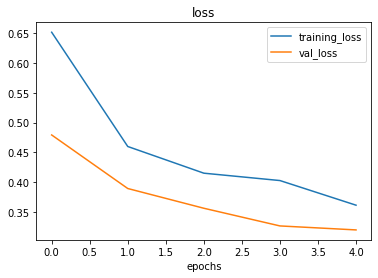

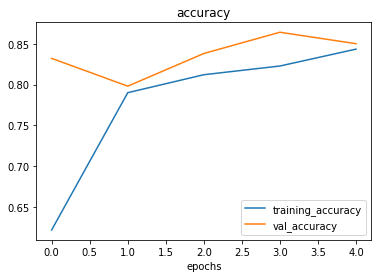

In [44]:
#plot loss curves
plot_loss_curves(history_5)

### Data augmentation

In [45]:
##reduce overfitting with data augmentation
# create ImageDataGen training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,#how much do you want to rotate
                                             shear_range=0.2,#how much do you want to shear an image(kırpmak)
                                             zoom_range=0.2,#zoom in randomly on an image
                                             width_shift_range=0.2,#move your image around x axis
                                             height_shift_range=0.3,#"     "     "     " y axis
                                             horizontal_flip=True)

# Create image data gen without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# datagen without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data Augmentation:**(büyütme,artırma) is the process of altering our training data, leading it to have more diversity(çeşitlilik) and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [46]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)#for demonstration purpose only

#create non augmented train data batches
print("NON Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)#for demonstration purpose only

#create non augmented test data batches
print("NON Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224,224),
                                               batch_size=32,
                                              class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
NON Augmented training data
Found 1500 images belonging to 2 classes.
NON Augmented test data
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using ImageDataGen built-in dtaa augmentation parameters our images are left as they are in the directories but are modeified as they loaded into the model.

If a model perfoms well on augmented training data hopefully that rranslates to performing well on non augmented test data.

In [47]:
#visualize some augmented data
#sample data batches(
#labels not augmented just data(images)
images, labels= train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


showing image number: 7


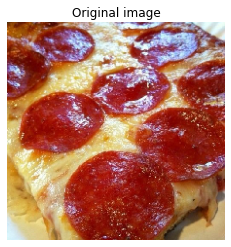

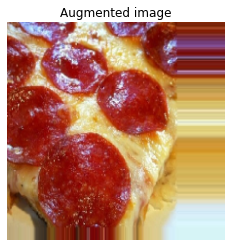

In [48]:
#show original image and augmented image
import random
random_number = random.randint(0,32)#batch size
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

We seen what augmented training data looks like, lets build a model.

In [50]:
# create model
model_6= Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit
history_6=model_6.fit(train_data_augmented,
                  epochs=5,
                  steps_per_epoch=len(train_data_augmented),
                  validation_data=test_data,
                  validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 494ms/step - loss: 0.7177 - accuracy: 0.4547 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6926 - accuracy: 0.5013 - val_loss: 0.6729 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6814 - accuracy: 0.6167 - val_loss: 0.6044 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6671 - accuracy: 0.6320 - val_loss: 0.5825 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6221 - accuracy: 0.6473 - val_loss: 0.5510 - val_accuracy: 0.7260


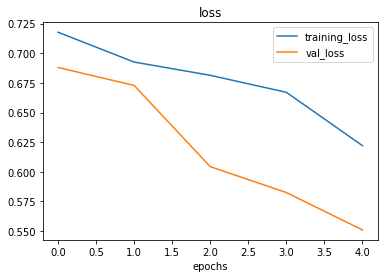

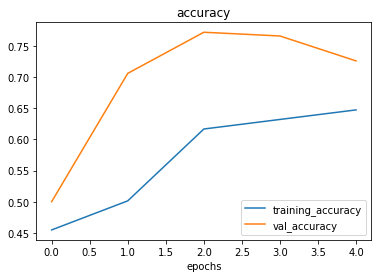

In [51]:
# if results is bad increase or decrease augmentation params
#visualize
plot_loss_curves(history_6)

### Shuffle training data on augmented
Train same model and see what happens.

In [52]:
# Import data and augment it from training directory
print("Augmented + shuffled training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)#shuffled is a good think, increase the randomness


Augmented + shuffled training data
Found 1500 images belonging to 2 classes.


In [53]:
#create same as model_6
model_7 =Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#compile
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit
history_7= model_7.fit(train_data_augmented_shuffled,
                  epochs=5,
                  steps_per_epoch=len(train_data_augmented_shuffled),
                  validation_data=test_data,
                  validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 522ms/step - loss: 0.6344 - accuracy: 0.6367 - val_loss: 0.4714 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5500 - accuracy: 0.7280 - val_loss: 0.3766 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 29s 630ms/step - loss: 0.5075 - accuracy: 0.7473 - val_loss: 0.4411 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 21s 453ms/step - loss: 0.5008 - accuracy: 0.7593 - val_loss: 0.3578 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 21s 453ms/step - loss: 0.4866 - accuracy: 0.7707 - val_loss: 0.4361 - val_accuracy: 0.7920


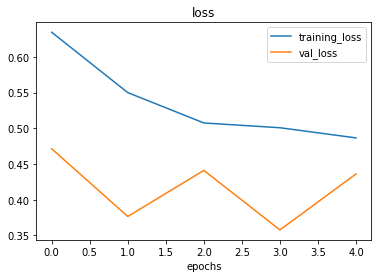

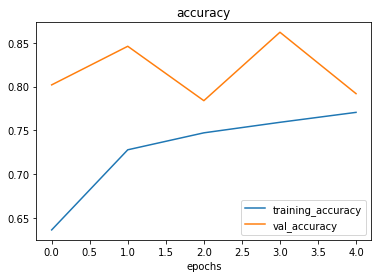

In [54]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case pizza and steak at the same time instead of just pizza then steak).

### Repeat until satisfied

Improve our model:
* Increase the number of model layers (add COnv2D/MAxPool2D)
* Increase the number of filters in each conv layer(from 10 to 64)
* train for longer(more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case)


### Make a prediction with our trained model on our own custom data

In [55]:
print(class_names)

['pizza' 'steak']


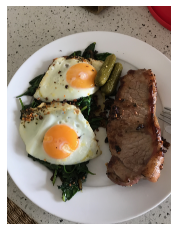

In [60]:
#view our example image
#import matplotlib.image as mpimg
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
import matplotlib.pyplot as plt
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [62]:
# check the shape of our image
steak.shape

(4032, 3024, 3)

model expect 4 dim.

**Note:** when you a train a neural network and you want to make a prediction with it on yout own custom data, its important than your custom data is preprocessed into the same format as the data your model was trained on.

In [66]:
#create a func to import and image and resize it to be able to used with our model
def load_and_pred_image(filename, img_shape=224):
  """
  Reads an image from filename turns it into a tensor and reshapes it to (img_shape,img_shape,color_channels).
  """
  # read in the image
  img = tf.io.read_file(filename)
  #decode the read file into a tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #rescale image (1-0)
  img=img/255.
  return img

In [65]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [68]:
steak=load_and_pred_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [69]:
model_7.predict(tf.expand_dims(steak,axis=0))#expand the shape of steak to [batch_size,widht,height,color channel]
#gives us probability

1/1 [==============================] - 0s 161ms/step


array([[0.9361983]], dtype=float32)

In [70]:
tf.expand_dims(steak,axis=0).shape

TensorShape([1, 224, 224, 3])

Looks like our custom image is being put though our model, however, it currently outputs a prediction probability, wouldnt it be nice if we could visualize the image as well as the models prediction?

In [71]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred_class = class_names[int(tf.round(pred))]
pred_class

1/1 [==============================] - 0s 14ms/step


'steak'

In [72]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted
  class as the title.
  """
  #import the target image and preprocess it
  img = load_and_pred_image(filename)
  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction={pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 16ms/step


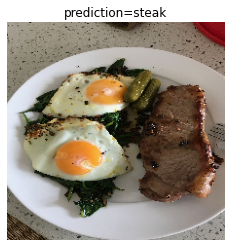

In [73]:
pred_and_plot(model_7, "03-steak.jpeg")

1/1 [==============================] - 0s 21ms/step


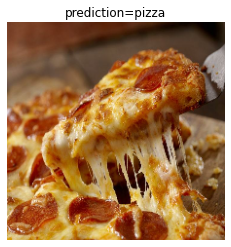

In [76]:
#lets try another one
#!wget https://imgrosetta.mynet.com.tr/file/11920486/11920486-728xauto.jpg
#pizza_2 = mpimg.imread("02-pizza.jpg")
pred_and_plot(model_7, "02-pizza.jpg")


1/1 [==============================] - 0s 15ms/step


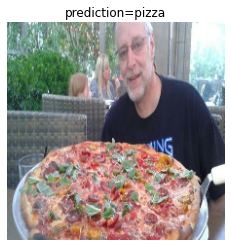

In [84]:
#!wget https://media-cdn.tripadvisor.com/media/photo-s/07/b7/55/ec/melanzane-and-my-dad.jpg
pred_and_plot(model_7, "pizza-dad.jpg")

# Multi-class Image Classification(10 classes food)
1. Become one with data
2. Preprocess data (get it ready for model)
3. Create model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat

## 1) Import data and one with it

In [87]:
import zipfile
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [88]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [89]:
#setup the train and test directories
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [91]:
#lets get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['207578.jpg']
Image shape: (512, 382, 3)


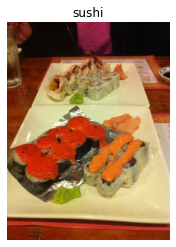

In [99]:
#visualize
import random
img = view_random_image(target_dir=test_dir,target_class=random.choice(class_names))

## 2) Preprocess the data

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size=32,
                                               class_mode = "categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224,224),
                                              batch_size=32,
                                              class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3)Create model

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
#create model
model_8 =Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")#number of folders in the dataset the SAME as the one in Dense
])

#compile
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


## 4)Fit the model

In [111]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

#validation_steps=int(0.25*len(test_data)))#it would go through 25 percent of the test data to validate it while training instead of whole test data


Epoch 1/5
235/235 [==============================] - 38s 162ms/step - loss: 0.1266 - accuracy: 0.9653 - val_loss: 4.2594 - val_accuracy: 0.3125
Epoch 2/5
235/235 [==============================] - 42s 177ms/step - loss: 0.0580 - accuracy: 0.9845 - val_loss: 4.7099 - val_accuracy: 0.2961
Epoch 3/5
235/235 [==============================] - 36s 153ms/step - loss: 0.0330 - accuracy: 0.9915 - val_loss: 5.1875 - val_accuracy: 0.2845
Epoch 4/5
235/235 [==============================] - 36s 154ms/step - loss: 0.0396 - accuracy: 0.9891 - val_loss: 4.9848 - val_accuracy: 0.3355
Epoch 5/5
235/235 [==============================] - 36s 153ms/step - loss: 0.0399 - accuracy: 0.9883 - val_loss: 6.4272 - val_accuracy: 0.2632


## 5) Evaluate the model

In [112]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 5.9004 - accuracy: 0.2892


[5.900419235229492, 0.2892000079154968]

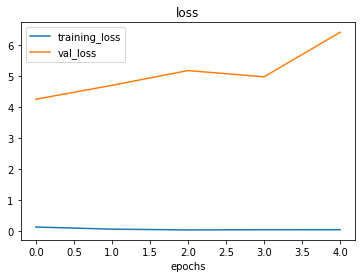

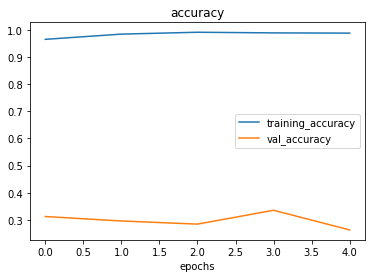

In [113]:
#check out models loss curves on the 10 classes
plot_loss_curves(history_8)#tells our model overfitting according to loss graph

It seems our model is overfitting the training set quite badly. In other words, its getting great result on the training data but fails to generaklize well to unseen data and performs poorly on the test dataset.

## 6)Adjust the model hyperparameters

In [114]:
#lets remove 2 conv layer to simplify our model
#create model
model_9 =Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")#number of folders in the dataset the SAME as the one in Dense
])

#compile
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [115]:
model_9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 29160)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [116]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 178ms/step - loss: 2.1854 - accuracy: 0.2351 - val_loss: 1.9574 - val_accuracy: 0.3100
Epoch 2/5
235/235 [==============================] - 54s 231ms/step - loss: 1.7816 - accuracy: 0.3935 - val_loss: 1.9102 - val_accuracy: 0.3248
Epoch 3/5
235/235 [==============================] - 49s 208ms/step - loss: 1.4628 - accuracy: 0.5148 - val_loss: 1.9485 - val_accuracy: 0.3312
Epoch 4/5
235/235 [==============================] - 46s 195ms/step - loss: 1.0040 - accuracy: 0.6824 - val_loss: 2.1969 - val_accuracy: 0.3016
Epoch 5/5
235/235 [==============================] - 41s 176ms/step - loss: 0.5528 - accuracy: 0.8415 - val_loss: 2.6409 - val_accuracy: 0.2816


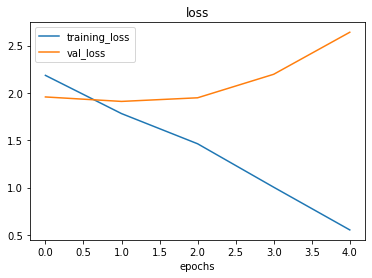

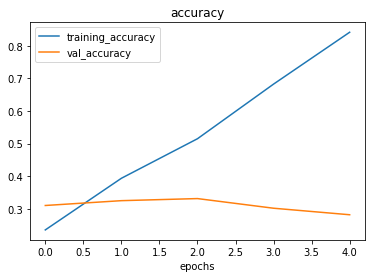

In [117]:
plot_loss_curves(history_9)#Its not work, try augmentation

Try to reduce overfitting with data augmentation.

Ideally we want to:
* Reduce overfitting(get the train and validation loss curves closeR)
* Improve validation accuracy

In [118]:
#create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [119]:
model_10 = tf.keras.models.clone_model(model_8)

#compile
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [120]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_28 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_30 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [121]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_28 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_30 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [122]:
#fit
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 137s 582ms/step - loss: 2.2349 - accuracy: 0.1559 - val_loss: 2.0551 - val_accuracy: 0.2784
Epoch 2/5
235/235 [==============================] - 134s 570ms/step - loss: 2.0770 - accuracy: 0.2531 - val_loss: 2.0448 - val_accuracy: 0.2772
Epoch 3/5
235/235 [==============================] - 145s 616ms/step - loss: 1.9999 - accuracy: 0.2995 - val_loss: 1.9044 - val_accuracy: 0.3356
Epoch 4/5
235/235 [==============================] - 115s 489ms/step - loss: 1.9784 - accuracy: 0.3097 - val_loss: 1.8204 - val_accuracy: 0.3816
Epoch 5/5
235/235 [==============================] - 109s 465ms/step - loss: 1.9272 - accuracy: 0.3277 - val_loss: 1.8243 - val_accuracy: 0.3660


In [123]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8243 - accuracy: 0.3660


[1.8242793083190918, 0.3659999966621399]

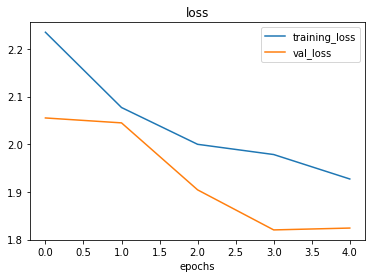

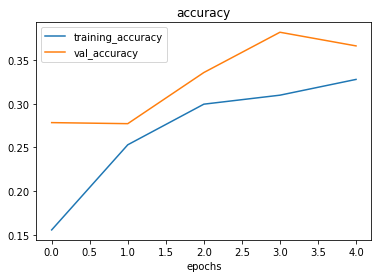

In [124]:
plot_loss_curves(history_10)

That looks much better, the loss curves are much closer to each other than the baseline model and they look like theyre heading in the right direction so if we were train for longer we might see further improvements.

## 7)Repeat until satified

Trying to bring our loss curves closer together and improve accuracies.
how?

By running lots of experiments,
- restructuring our models architecture(increase layers&hidden units)
- adjust the learning rate
- different methods of data augmentation (adjust the hyperparameters in our ImageDataGen instance)
- training for longer(10 epochs instead of 5)
- try transferlearning

### Making a prediction with our trained model(10)

In [125]:
#modified our pred and plot func prepare for multyclass predictions
def pred_and_plot_modified(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted
  class as the title.
  """
  #import the target image and preprocess it
  img = load_and_pred_image(filename)
  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #add in logic for multiclass & get predclass name
  if len(pred[0]) > 1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction={pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 15ms/step


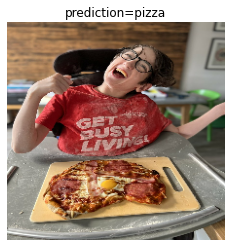

In [134]:
pred_and_plot_modified(model_10,"01-pizza.jpg",class_names=class_names)

--2023-02-01 13:15:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.007s  

2023-02-01 13:15:52 (244 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

1/1 [==============================] - 0s 19ms/step


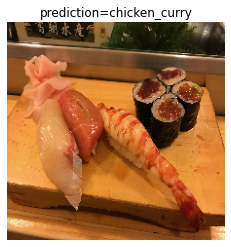

In [130]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
pred_and_plot_modified(model_10,"03-sushi.jpeg",class_names=class_names)

1/1 [==============================] - 0s 27ms/step


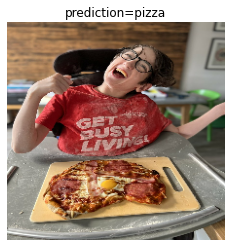

In [135]:
pred_and_plot_modified(model_3,"01-pizza.jpg",class_names=["pizza","steak"])

# Saving and Loading our model

In [136]:
model_10.save("saved_trained_model_10")

In [ ]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
#loaded_model_10.evaluate(test_data)